# Part I - Exploratory & Explanatory  Data Analysis of Prosper Loan
## BY  Yahaya Musa Kayode

## Introduction
> Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than $23 billion in loans to more than 1,400,000 people, [source](https://www.prosper.com/about).<br>
> The dataset used in this project contained `113,937` loan records  with `81` variables on each loan record from the 4th quarter `2005` to the 1st quarter `2014`. These variables includes `loan amount`, `borrower rate`, `current loan status`, `borrower income`,`borrower employment status`, `borrower annual percentage rate` among others. Complete details about the data dictionary can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).


## Data Wrangling
> This section entails, gathering, assessing, loading the dataset, examing the dataset and perhaps cleaning the dataset to make it suitable for a better analysis.  


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Data Assessing
> In this section, the dataset was assessed in order to identify quality and tidiness issues using both visual assessment and programmatic assessement methods.


In [2]:
# Read the dataset into a Pandas DataFram
prosper_loan_df = pd.read_csv("prosper_loan_data.csv")

In [3]:
# Few the first 5 records
prosper_loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Check the shape of the dataset
print(prosper_loan_df.shape)
# Have a deeper look of the dataset
print(prosper_loan_df.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

It can be observed from above that the pattern of naming is not uniform across the column labels, a little adjustment will be made by replacing all white spaces `" "` with  underscore `_` using the `replace()` function.

In [5]:
# replcae all the white spaces in the column labels
prosper_loan_df.columns = prosper_loan_df.columns.str.replace(" ", "_")

In [6]:
# Confirm the white sapces has be replaced by looking at the column labels
for i, v in enumerate(prosper_loan_df):
    print(i,v)

0 ListingKey
1 ListingNumber
2 ListingCreationDate
3 CreditGrade
4 Term
5 LoanStatus
6 ClosedDate
7 BorrowerAPR
8 BorrowerRate
9 LenderYield
10 EstimatedEffectiveYield
11 EstimatedLoss
12 EstimatedReturn
13 ProsperRating_(numeric)
14 ProsperRating_(Alpha)
15 ProsperScore
16 ListingCategory_(numeric)
17 BorrowerState
18 Occupation
19 EmploymentStatus
20 EmploymentStatusDuration
21 IsBorrowerHomeowner
22 CurrentlyInGroup
23 GroupKey
24 DateCreditPulled
25 CreditScoreRangeLower
26 CreditScoreRangeUpper
27 FirstRecordedCreditLine
28 CurrentCreditLines
29 OpenCreditLines
30 TotalCreditLinespast7years
31 OpenRevolvingAccounts
32 OpenRevolvingMonthlyPayment
33 InquiriesLast6Months
34 TotalInquiries
35 CurrentDelinquencies
36 AmountDelinquent
37 DelinquenciesLast7Years
38 PublicRecordsLast10Years
39 PublicRecordsLast12Months
40 RevolvingCreditBalance
41 BankcardUtilization
42 AvailableBankcardCredit
43 TotalTrades
44 TradesNeverDelinquent_(percentage)
45 TradesOpenedLast6Months
46 DebtToIncome

In [7]:
# # descriptive statistics of numeric variables
prosper_loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating_(numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


It can be observed from above that the maximum loan length is `60 months`, the minimum loan length is `12 months`, while the average loan month is `40 months`.

In [8]:
prosper_loan_df.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [9]:
# Check the time the loan started in respect to the dataset
prosper_loan_df.ListingCreationDate.min()

'2005-11-09 20:44:28.847000000'

In [10]:
# Check the time the loan stopped in respect to the dataset
prosper_loan_df.ListingCreationDate.max()

'2014-03-10 12:20:53.760000000'

### Structure of the dataset

> The dataset contained `113,937` records and `81` columns, the dataset is from the 4th quater `2005` to the 1st quarter `2014`.

### Features of interest in the dataset
> The BorrowerAPR will be extensively analysed in relationship with other variables such as borrower's rating, score, occupation and income among others in order to ascertain factors that could influence changes in borrower's APR.

### Dataset features that will help in the investigation of features of interest
As many features as possible will be explored for a better insight, however, below are some of the once to be explored:
> - LoanOriginalAmount
> - LoanOriginationQuarter
> - CreditGrade 
> - EmploymentStatus
> - Term 
> - LoanStatus
> - BorrowerAPR 
> - LenderYield
> - ProsperRating (Alpha)
> - ProsperScore 
> - ListingCategory
> - Occupation
> - EmploymentStatusDuration
> - IsBorrowerHomeowner
> - CurrentDelinquencies
> - IncomeRange
> - StatedMonthlyIncome
> - TotalProsperLoans
> - And perhaps other variables 

## Univariate Exploration

> This section investigates distributions of individual variables to check for correlation, outliers among others.  

In [11]:
# Function for variables distribution
def distribution_plot(dataframe, column_name,bins_base):
    column_name_counts = dataframe[column_name].value_counts()
    plot=plt.hist(data=dataframe,x=column_name,bins=bins_base)
    return(plot)

# Function to plot virtical bar
def count_plot(dataframe,column_name, xlabel="", ylabel=""):
    base_color=sb.color_palette()[0]
    column_name_count=dataframe[column_name].value_counts()
    plot=sb.countplot(data=dataframe,x=column_name,color=base_color,order=column_name_count.index);
    return(plot)

# Function to plot horizontal bar
def count_plot_horizontal(dataframe,column_name, xlabel="", ylabel=""):
    base_color=sb.color_palette()[0]
    column_name_count=dataframe[column_name].value_counts()
    plot=sb.countplot(data=dataframe,y=column_name,color=base_color,order=column_name_count.index);
    return(plot)


**Borrower's Annual Percentage Rate (APR)**	

In [12]:
# Check where BorrowerAPR has the most counts
prosper_loan_df.BorrowerAPR.value_counts().head()

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
Name: BorrowerAPR, dtype: int64

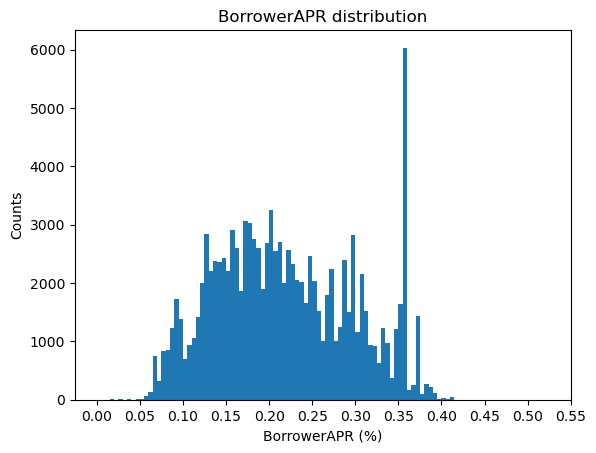

In [13]:
#  BorrowerAPR distribution 
bins_base = np.arange(0, prosper_loan_df['BorrowerAPR'].max(), 0.005)
distribution_plot(prosper_loan_df,'BorrowerAPR', bins_base)

plt.title("BorrowerAPR distribution")
plt.xlabel("BorrowerAPR (%)")
plt.ylabel("Counts")
plt.xticks(np.arange(0, prosper_loan_df['BorrowerAPR'].max()+0.05, 0.05));


It can be deduced from above that `BorrowerAPR` have an almost normal distribution, with an exceptional count when BorrowerAPR is `0.35797%` and  ` 0.35643%`.

**Monthly income distribution**
> There is need to examine the monthly income distributions of the borrowers.

In [14]:
prosper_loan_df.StatedMonthlyIncome.value_counts().head()

4166.666667    3526
5000.000000    3389
3333.333333    2917
3750.000000    2428
5416.666667    2374
Name: StatedMonthlyIncome, dtype: int64

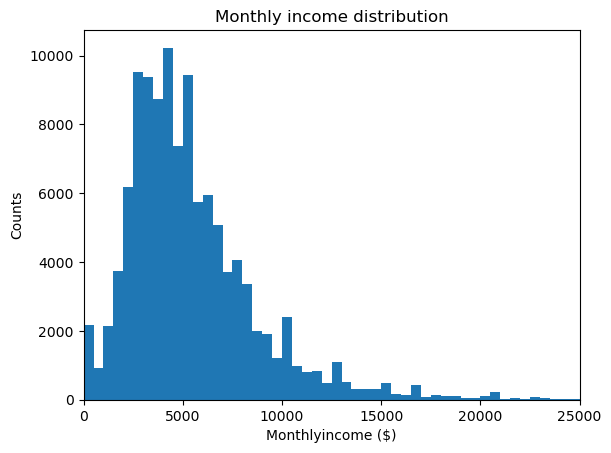

In [15]:
# IncomeRange distribution 
bins=np.arange(0, prosper_loan_df["StatedMonthlyIncome"].max()+500,500)
distribution_plot(prosper_loan_df,'StatedMonthlyIncome', bins)

plt.title("Monthly income distribution")
plt.xlabel("Monthlyincome ($)")
plt.xlim(0,25000);
plt.ylabel("Counts");

The above graph is righty skewed, monthly income have its peak around `$3,000` and `$5,000`.

**The Lender Yield**
> Checking out the lender yield distribution 

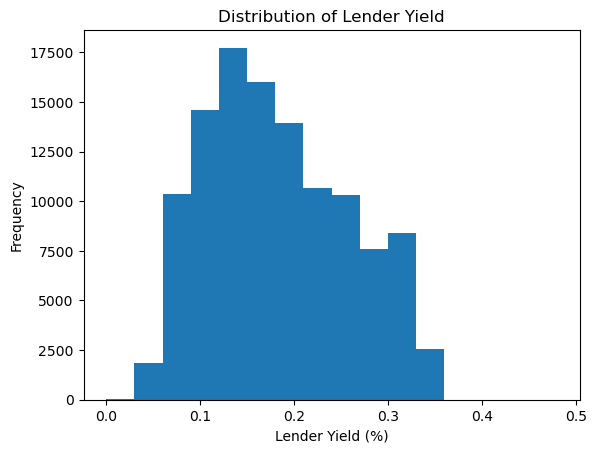

In [16]:
bins_base = np.arange(0, prosper_loan_df['LenderYield'].max(), 0.03)
distribution_plot(prosper_loan_df,"LenderYield",bins_base);

plt.xlabel("Lender Yield (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Lender Yield");

The above Leander Yield distribution appears almos as normal distribution with its peak between `0.1` and `0.2`.

**Loan original amount**
> Check the original loan amount that is usually given out

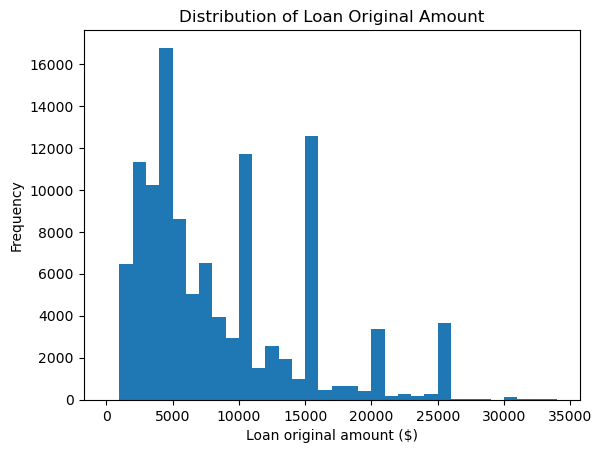

In [17]:
bins_base = np.arange(0, prosper_loan_df['LoanOriginalAmount'].max(), 1000)
distribution_plot(prosper_loan_df,"LoanOriginalAmount",bins_base);

plt.xlabel("Loan original amount ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Loan Original Amount");

**Employment status of the borrowers**
>  Exploring the employment status of the borrowers to further deep dive if unemployment is responsible for high borrowing.

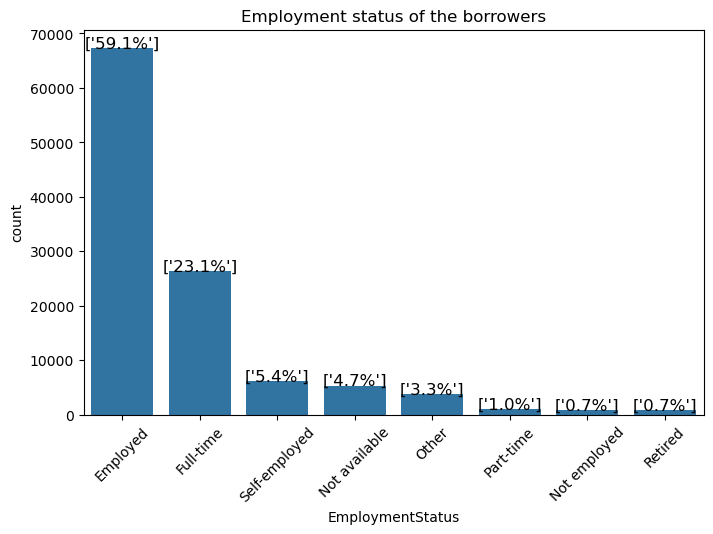

In [18]:
plt.figure(figsize=(8,5)) 
#  Call the `count_plot` function
count_plot(prosper_loan_df, 'EmploymentStatus')
plt.title ("Employment status of the borrowers")

# Add percentage at the top of each column
col_count=prosper_loan_df["EmploymentStatus"].value_counts()
locs, labels=plt.xticks(rotation=45)
for loc, label in zip(locs,labels):
    count = col_count[label.get_text()]
    pct =["{:0.1f}%".format(100*count/prosper_loan_df.shape[0])]
    plt.text(loc, count+2, pct, ha="center",fontsize=12)

From the graph above, one can clearly see that almost `60%` of the borrowers are employed, `0.7%` of them are not employed, while `0.7%` are retired. This implies that unemployment is not responsible for high borrowing.

**Major occcupation of the borrowers**

In [19]:
prosper_loan_df.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

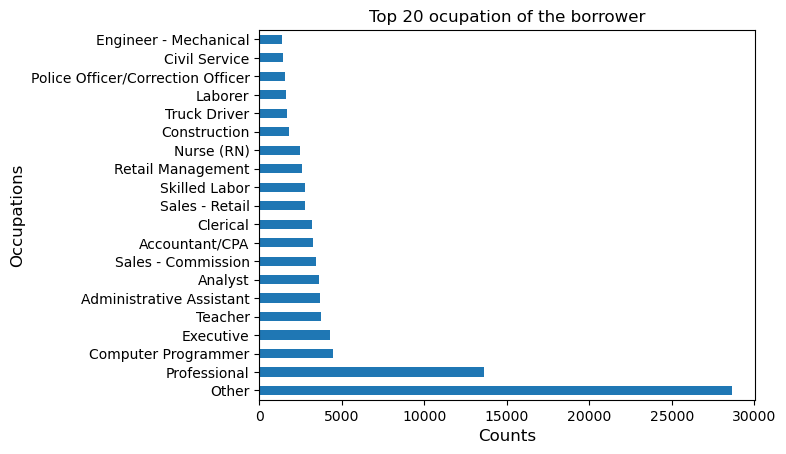

In [20]:
# Function to plot horizontal bar for the top 20 ocupations of the borrower. 
def horizontal_bar():
    base_color=sb.color_palette()[0]
    prosper_loan_df.Occupation.value_counts().head(20).plot(kind='barh');
    plt.title("Top 20 ocupation of the borrower", fontsize=12)
    plt.ylabel("Occupations", fontsize=12)
    plt.xlabel("Counts", fontsize=12)

horizontal_bar()     

While `Other` dominate the occupation of the borrowers with over `28,000` people, `Computer Programmer` appears to be the most specific job of them all with `4478` records. Deep further to see how the occupation of the borrowers is related to ther APR.

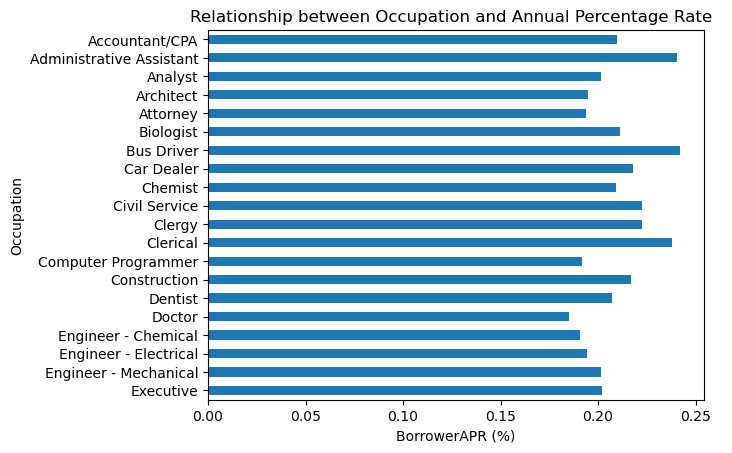

In [21]:
# Bar plot for APR mean for the top 20 occupations.
top_20_ocupations =  prosper_loan_df.Occupation.value_counts().head(20)
top_20_ocupations = prosper_loan_df.groupby('Occupation').BorrowerAPR.mean()[19::-1]
plt.title('Relationship between Occupation and Annual Percentage Rate  ')
top_20_ocupations.plot(kind = 'barh')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('Occupation');
           

It is intresting to know from the above graph that almost all the ocupations have the same BorrowerAPR

**Distribution of prosper score**

Text(0, 0.5, 'Count')

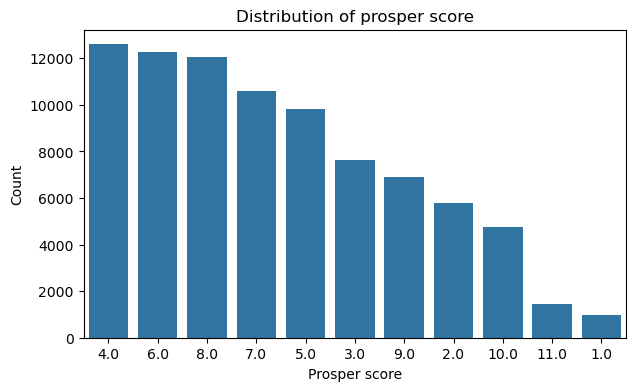

In [22]:
plt.figure(figsize=(7,4)) 
#  Call the `count_plot` function
count_plot(prosper_loan_df, 'ProsperScore')
plt.title ("Distribution of prosper score");
plt.xlabel("Prosper score")
plt.ylabel("Count")

It appears from the above chart that there is no a clear pattern about the prosper score, as `4.0` have the highest score, while `1.0` have the lowest score. 

**Distribution of prosper rating**

In [23]:
prosper_loan_df['ProsperRating_(Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating_(Alpha), dtype: int64

Text(0, 0.5, 'Count')

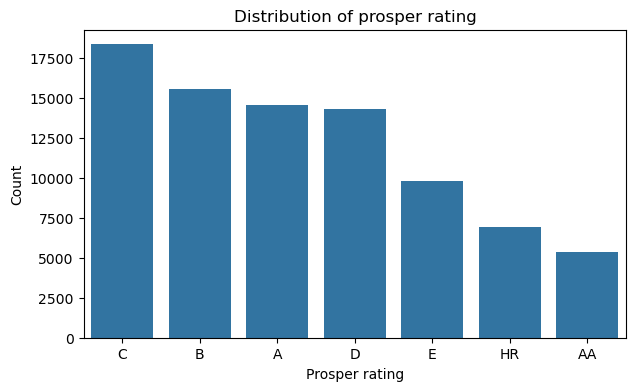

In [24]:
plt.figure(figsize=(7,4)) 
#  Call the `count_plot` function
count_plot(prosper_loan_df, 'ProsperRating_(Alpha)')
plt.title ("Distribution of prosper rating");
plt.xlabel("Prosper rating")
plt.ylabel("Count")

`C` have the highest rating with `18345`, while `AA` have the least rating of  `5372`.

**ProsperRating Vs. BorrowerAPR Mean**

In [25]:
# Chart ProsperRating vs BorrowerAPR mean
ProsperRating_mean = prosper_loan_df.groupby('ProsperRating_(Alpha)').BorrowerAPR.mean()
ProsperRating_mean 

ProsperRating_(Alpha)
A     0.138909
AA    0.090041
B     0.184030
C     0.226124
D     0.280581
E     0.330551
HR    0.356061
Name: BorrowerAPR, dtype: float64

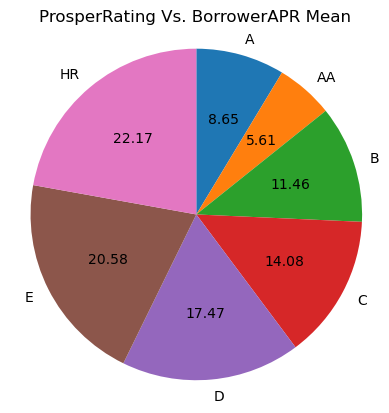

In [26]:
plt.pie(ProsperRating_mean, labels = ProsperRating_mean.index, startangle = 90,
    counterclock = False, autopct='%1.2f')
plt.axis('square') 
plt.title('ProsperRating Vs. BorrowerAPR Mean');

The data dictionry revealed that the Borrowers Rating are in ascending order, that is, from the  highest rating to the lowest rating (`AA, A, B, C, D, E, HR`). The pie chart above confirmed this, as the highest rating `AA` received lowest APR of `5.61`, while the lowerest rating `HR` received the highest APR of `22.17`. This implies that borrowers with higher rating received lower APR.

**Income range of the borrowers**
> Maybe low income is responsible for borrwing, the data will reveal much. 

In [27]:
# Checking the percentage of income across board
prosper_loan_df.IncomeRange.value_counts()/prosper_loan_df.shape[0] * 100

$25,000-49,999    28.254211
$50,000-74,999    27.251902
$100,000+         15.216304
$75,000-99,999    14.846801
Not displayed      6.794106
$1-24,999          6.384230
Not employed       0.707408
$0                 0.545038
Name: IncomeRange, dtype: float64

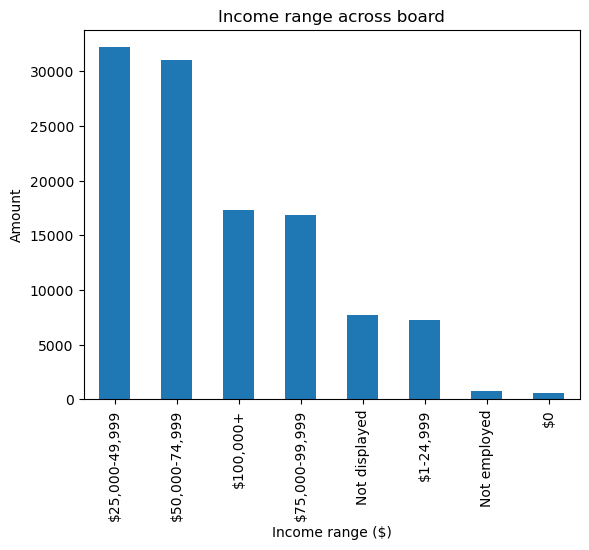

In [28]:
# Visualise the income the income range 
prosper_loan_df.IncomeRange.value_counts().plot(kind='bar')
plt.title("Income range across board")
plt.xlabel("Income range ($)")
plt.ylabel("Amount");

It can be deduced from above that `28%` of the income range falls between  `$25,000` and `49,999`. 
Could it be this amount is not sufficient for them and that is why they opt for a loan? Deep further to check for debt to income ratio.


**Debt to income ratio**
> Debt to income ratio refer to the debt to income ratio of the borrower at the time the credit profile was pulled. This value is `Null` if the debt to income ratio is not available. This value is capped at `10.01` (any debt to income ratio larger than `1000%` will be returned as `1001%`).																		


In [29]:
# Check the statistic distribution of `DebtToIncomeRatio`
prosper_loan_df.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In conformity with what is in the data dictionary, the maximum DebtToIncomeRatio is `10.01`.

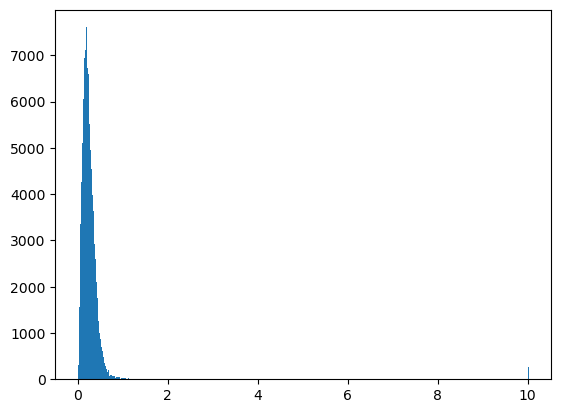

In [30]:
bins=np.arange(0, prosper_loan_df["DebtToIncomeRatio"].max()+0.02,0.02)
distribution_plot(prosper_loan_df,'DebtToIncomeRatio', bins );

The above distribution is not properly spread out, however, the data dictionary revealed that hardly do we have `DebtToIncomeRatio` that is greater `1`. Hence, distribution for `DebtToIncomeRatio <= 1` would be ploted for a better view.

In [31]:
# Check for DebtToIncomeRatio = 1
DebtToIncomeRatio_df_1 = prosper_loan_df[prosper_loan_df['DebtToIncomeRatio'] == 1]
DebtToIncomeRatio_df_1.DebtToIncomeRatio

12213    1.0
12375    1.0
25978    1.0
46844    1.0
54418    1.0
62218    1.0
69443    1.0
69639    1.0
70868    1.0
88628    1.0
89818    1.0
91809    1.0
95268    1.0
96324    1.0
Name: DebtToIncomeRatio, dtype: float64

In [32]:
# Exclude DebtToIncomeRatio that is greater 1
DebtToIncomeRatio_df = prosper_loan_df[prosper_loan_df['DebtToIncomeRatio'] <=1]

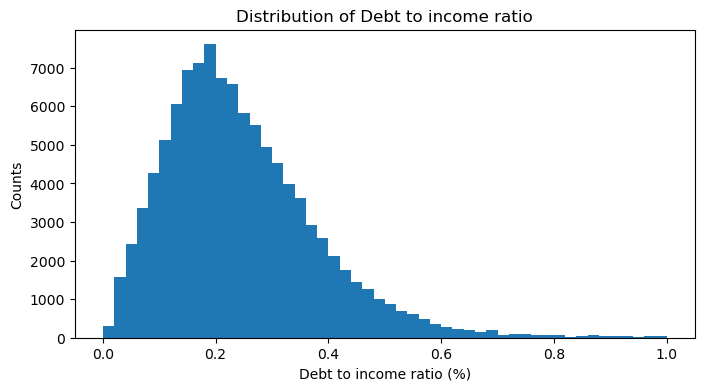

In [33]:
# Distribution of DebtToIncomeRatio
plt.figure(figsize=[8,4])
bins=np.arange(0, DebtToIncomeRatio_df["DebtToIncomeRatio"].max()+0.02,0.02)
distribution_plot(DebtToIncomeRatio_df,'DebtToIncomeRatio', bins);  
plt.title('Distribution of Debt to income ratio')
plt.xlabel('Debt to income ratio (%)')
plt.ylabel('Counts');

Above distribution is righty skewed with peak at `0.2`, after which a downward trend was observed.

**Major reason for collecting loan**
> Exploring the `ListingCategory` will reveal the major reason for collectng loan by the borrowers.
> The data dictionary explained that each listing category is being represented with a number, this will be leveraged.

In [34]:
# Create a dictionary for the `ListingCategory`
listing_ategory = {0:"Not Available",1:"Debt Consolidation",2:"Home Improvement", 
                   3 :"Business", 4:"Personal Loan",
                   5: "Student Use", 6:"Auto", 7:"Other", 8:"Baby&Adoption",
                   9 :"Boat", 10:"Cosmetic Procedure", 11:"Engagement Ring", 12:"Green Loans",
                   13:"Household Expenses", 14:"Large Purchases", 15:"Medical/Dental",
                   16:"Motorcycle", 17:"RV", 18:"Taxes", 19:"Vacation", 20:"Wedding Loans"
                  }

In [35]:
# Map the keys with their respective values 
prosper_loan_df['ListingCategory_(numeric)'] = prosper_loan_df['ListingCategory_(numeric)'].map(listing_ategory)

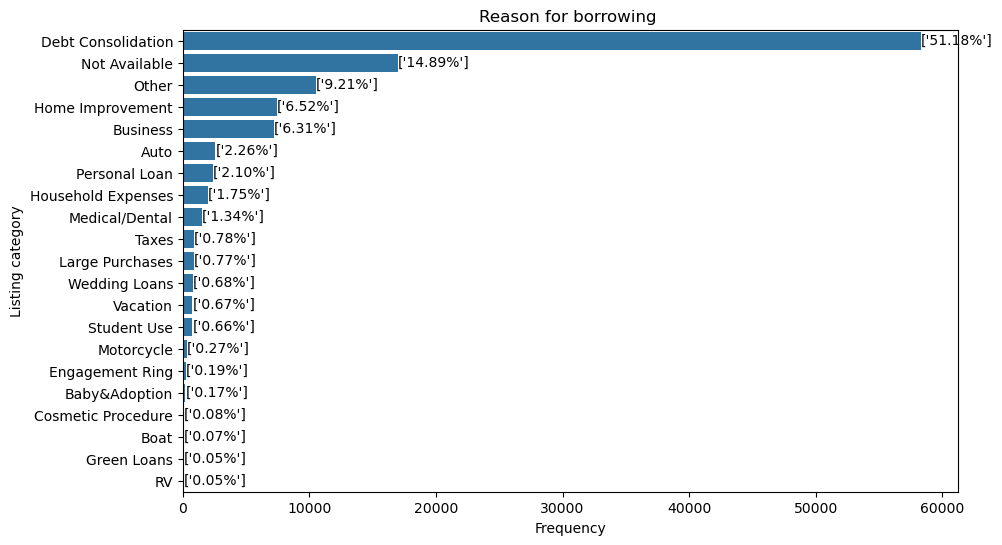

In [36]:
plt.figure(figsize=(10,6)) 
#  Call the `count_plot_horizontal` function
count_plot_horizontal(prosper_loan_df, 'ListingCategory_(numeric)')
plt.title ("Reason for borrowing ")
plt.ylabel("Listing category")
plt.xlabel("Frequency")

# include percentage on each column top
col_count = prosper_loan_df['ListingCategory_(numeric)'].value_counts()
for i in range(col_count.shape[0]):
    count = col_count[i]
    percentage = ["{:0.2f}%".format(100*count/prosper_loan_df.shape[0])]
    plt.text(++count, i, percentage, fontsize=10, va='center')

It can be depicted from the above graph that the reason for borowing cut across different areas of life, ranging from investment, medical, wedding, home improvement auto among others.
In all, `51.18%` of the borrower used the loan for `Debt Consolidation`,  `14.89%` do not specify their reason for borrowing, `6.31%` for busines, while `1.34%` is for medical.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Borrower's Annual Percentage Rate distribution have an almost normal distribution with it peak value at 0.3579% and  0.35643%. The monthly income is rightly skewed having its peak around `$3,000` and `$5,000`. The debt income ratio also showed a rightly skewed distribution with `0.2%` as its peak value.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> A none uniform naming was observed across the column labels, withouth much cleaning, a `replace()` function was used to replaced all the white spaces  `" "` with an underscore `_`.


## Bivariate Exploration

> In this section, investigation would be carried out about the relationships between pairs of 
variables.

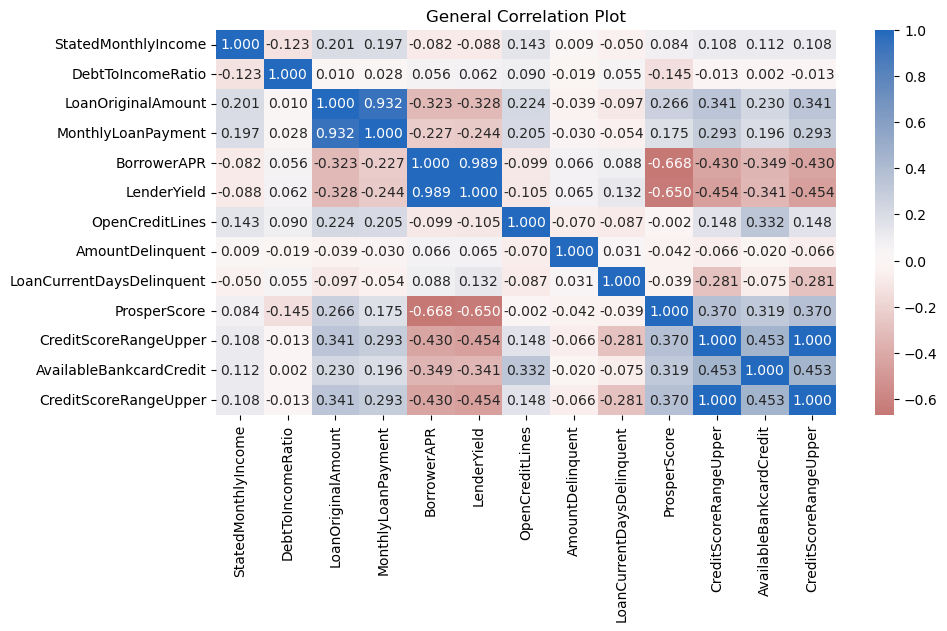

In [37]:
# Correlation between some of the quantitative variables
quant_vars=["StatedMonthlyIncome","DebtToIncomeRatio","LoanOriginalAmount","MonthlyLoanPayment","BorrowerAPR","BorrowerRate","LenderYield","OpenCreditLines","AmountDelinquent","LoanCurrentDaysDelinquent","ProsperScore"]
quantitative_var=["StatedMonthlyIncome","DebtToIncomeRatio",
                  "LoanOriginalAmount","MonthlyLoanPayment","BorrowerAPR",
                  "LenderYield", "OpenCreditLines","AmountDelinquent",
                  "LoanCurrentDaysDelinquent", "ProsperScore", "ProsperRating_(Alpha)",
                  'CreditScoreRangeUpper', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

plt.figure(figsize=[10,5])
sb.heatmap(prosper_loan_df[quantitative_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('General Correlation Plot') 
plt.show()

From the heatmap, a strong positive correlations can be observed between `MonthlyLoanPayment` and `LoanOriginalAmount`, with a value of `0.932`, as well as `BorrowerAPR` and `LenderYield` with a value of `0.989`. A negative correlations was observed between `BorrowerAPR` and `ProsperScore` with a value of `-0.668`, as well as `LenderYield` and `ProsperScore` with a value of `-0.650`.

**Relationship between loan original amount and monthly loan payment**

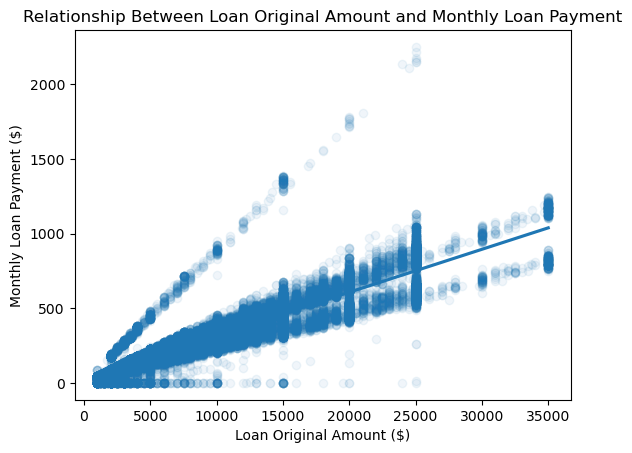

In [38]:
sb.regplot(data=prosper_loan_df,x="LoanOriginalAmount",y="MonthlyLoanPayment",scatter_kws={"alpha":1/15});
plt.xlabel("Loan Original Amount ($)");
plt.ylabel("Monthly Loan Payment ($)");
plt.title("Relationship Between Loan Original Amount and Monthly Loan Payment");

The is strong positive correlation between Loan Original Amount and Monthly Loan Payment, as the `Loan Original Amount` increases, the `Monthly Loan Payment` also increase. 

**Relationship between BorrowerAPR and LenderYield**

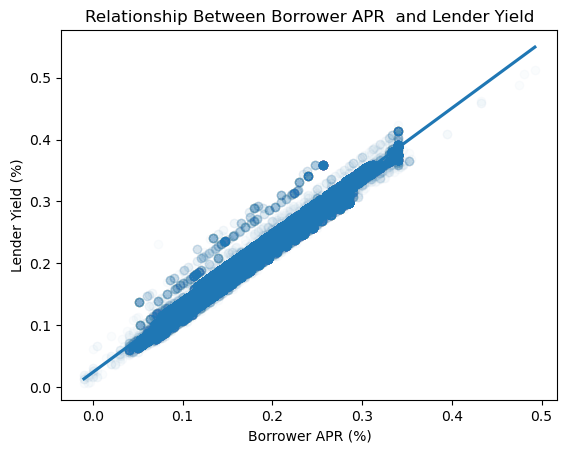

In [39]:
sb.regplot(data=prosper_loan_df,x="LenderYield",y="BorrowerAPR",scatter_kws={"alpha":0.02});
plt.xlabel("Borrower APR (%)");
plt.ylabel("Lender Yield (%)");
plt.title("Relationship Between Borrower APR  and Lender Yield");

A very strong positive correlation can be obverved in the above graph between `Borrower APR` and `Lender Yield`.

**Relationship between Employment status and Borrower APR**

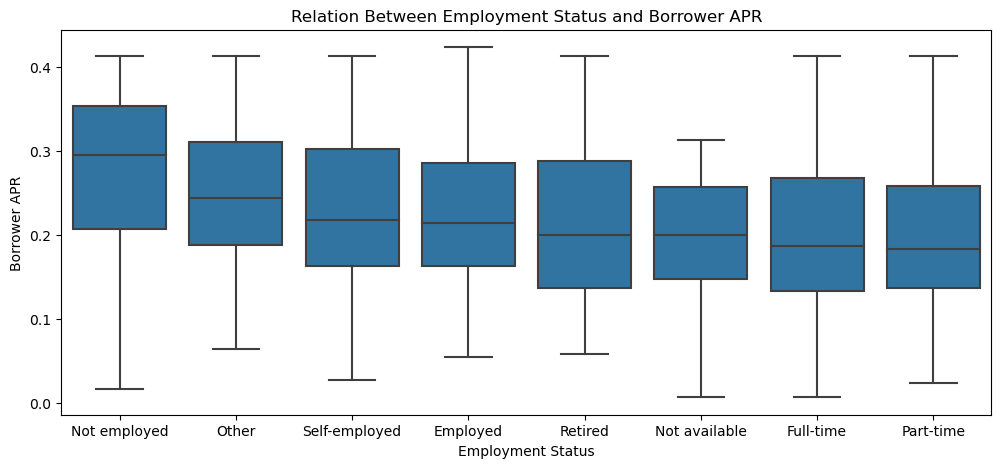

In [40]:
plt.figure(figsize=[12,5])
base_color=sb.color_palette()[0]
base_order = prosper_loan_df.groupby(by=["EmploymentStatus"])["BorrowerAPR"].median().sort_values().iloc[::-1].index
sb.boxplot(data=prosper_loan_df,x="EmploymentStatus",y="BorrowerAPR",color=base_color,order=base_order);

plt.xlabel("Employment Status");
plt.ylabel("Borrower APR");
plt.title("Relation Between Employment Status and Borrower APR");

The above boxplot revealed that employed has the lighest median, while part-time has the lowest median.

**Relationship Between Prosper Score and Borrower APR**


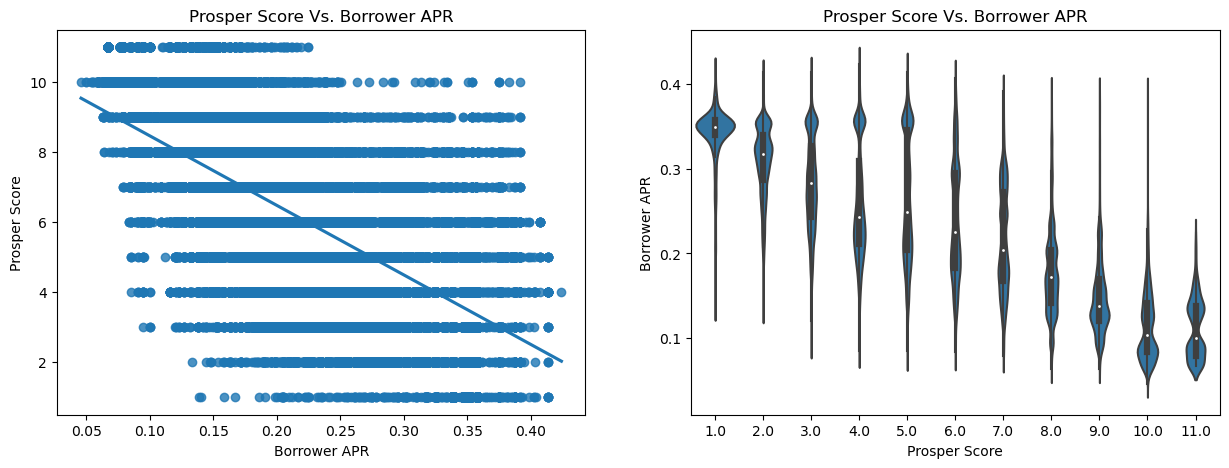

In [41]:
plt.figure(figsize = [15, 5])
base_color=sb.color_palette()[0]

plt.subplot(1,2,1)
sb.regplot(data=prosper_loan_df,x="BorrowerAPR", y="ProsperScore");
plt.ylabel("Prosper Score");
plt.xlabel("Borrower APR");
plt.title("Prosper Score Vs. Borrower APR");

plt.subplot(1,2,2)
sb.violinplot(data=prosper_loan_df,x="ProsperScore",y="BorrowerAPR",color=base_color);
plt.xlabel("Prosper Score");
plt.ylabel("Borrower APR");
plt.title("Prosper Score Vs. Borrower APR");

The above regplot and violinplot shows that there is a strong negative correlation between `Borrower` APR and `Prosper Score`

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a strong positive correlation between `Borrowers` and  `LenderYield`,  strong positive correlation was also observed between `Loan Original Amount` and `Monthly Loan Payment`. A negative correlation was noticed between `Borrower APR` and `Prosper Score`.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> Yes, the heatmap revealed that the `CreditScoreRangeUpper`, `AvailableBankcardCredit` and `CreditScoreRangeUpper` are all positively correlated to `ProsperScore` and negative correlated to `BorrwerAPR`>


## Multivariate Exploration

> In this section, a further investigation is carried out by creating plots of three variables.

**Relationship between Borrower APR Vs. ProsperScore and Lender Yield**

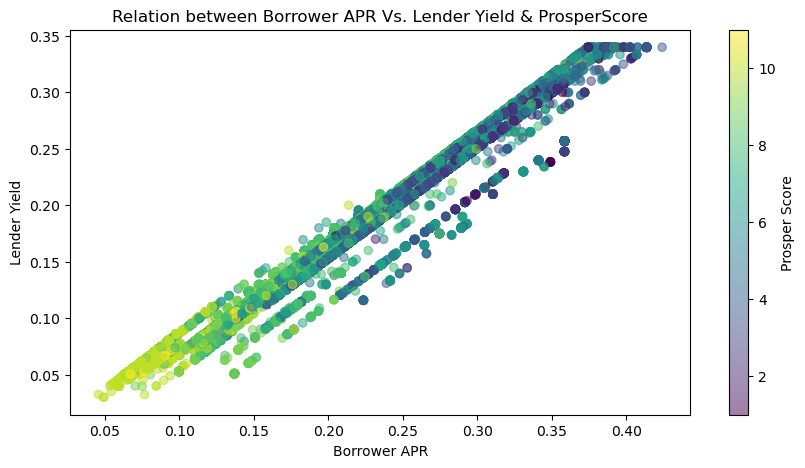

In [42]:
plt.figure(figsize=[10,5])
plt.scatter(data=prosper_loan_df,x="BorrowerAPR",y = "LenderYield",c="ProsperScore", alpha=0.5)
plt.xlabel("Borrower APR")
plt.ylabel("Lender Yield");
plt.title("Relation between Borrower APR Vs. Lender Yield & ProsperScore");
plt.colorbar(label="Prosper Score");

It can be depicted from the above graph that the loans with higher` Borrower APR` and `Lender yield` had a lower prosper score.

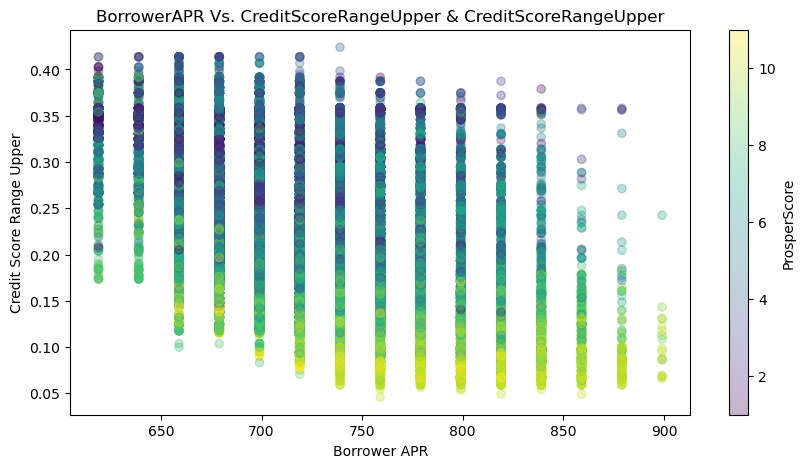

In [43]:
plt.figure(figsize = [10, 5]) 

plt.scatter(data = prosper_loan_df, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerAPR Vs. CreditScoreRangeUpper & CreditScoreRangeUpper')
plt.xlabel('Borrower APR')
plt.ylabel('Credit Score Range Upper');

The above plot revealed that `CreditScoreRangeUpper` and `ProsperScore` are negative correlated to `BorrowerAPR`. In addition, the visualization tells more on the effects of BorrowerAPR,  aslo, as the `CreditScoreRangeUpper` increase as `BorrowerAPR` decrease. The `ProsperScore` is added for color encodings.  `BorrowerAPR` decreases as `ProsperScore` increases.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is a strong psotitive correlation between `Borrower's APR` Vs. `Lender Yield` & `ProsperScor`. Meanwhile, `CreditScoreRangeUpper` and `ProsperScore` are negatively correlated to `BorrowerAPR`


## Conclusions
> The data revealed that the major reason for loan is for debt consolidation. Employees constitute the largest percentage of the borrowers with `59.1%`.<br>
>There are numbers of features that are either positively or negativity correlated with the BorrowerAPR. Also, a strong positive correlation was observed between Loan Original Amount and Monthly Loan Payment, as the Loan Original Amount increases,the Monthly Loan Payment also increase.
